<a href="https://colab.research.google.com/github/PANICDV/My-New-Repo/blob/main/Sprint_5_proyecto_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

El proposito del proyecto es poder  analizar dos tarifas que se brindan a los clientes de la empresa en estudio y ver si hay una diferencia sinificativa en el promedio entre las dos tarifas.

pasos que se realizara:
1. cargar y eplorar datos
2. preparar datos
3. calcular los ingresos mensuales por usuario y el excedente cuando pasan el limite de los paquetes gratuitos.
4. analizar la distribucion de minutos, SMS, datos por cada tarifa.
5. hacer pruebas estadisticas, para ver la diferencia que pueda haber entre las dos tarifas.

## Inicialización

In [ ]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Cargar datos

In [ ]:
# Carga los archivos de datos en diferentes DataFrames
calls_df = pd.read_csv ('https://docs.google.com/spreadsheets/d/1J7qFl6a3ECaqXNRG7Eo100suSOTA0F4nfQs-SRrxPBI/pub?gid=114928225&single=true&output=csv')
internet_df = pd.read_csv ('https://docs.google.com/spreadsheets/d/1R2YeYM8CYYvvv7Pl1n5VvsFPP004SM1pPucQX1EJYHE/pub?gid=1908429099&single=true&output=csv')
messages_df = pd.read_csv ('https://docs.google.com/spreadsheets/d/1r0LTMEJR-oId_OL7JePsdiXA76AhO3v901n0J5xvizo/pub?gid=810270392&single=true&output=csv')
plans_df = pd.read_csv ('https://docs.google.com/spreadsheets/d/1UwrI1PpS6Er_OuEhVkWc-Bd5p6uVDmNck-32NYrr2_0/pub?gid=1855681411&single=true&output=csv')
users_df = pd.read_csv ('https://docs.google.com/spreadsheets/d/11R0dsGMQbXH_Us7lK7P8diuTNp5OLVIH4Eawm61l6u4/pub?gid=461460127&single=true&output=csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

# Explorando los datos

In [ ]:
#CALLS
print(calls_df.describe())

             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000


In [ ]:
calls_df.duplicated().sum()

0

In [ ]:
calls_df.isna().sum()

,0
id,0
user_id,0
call_date,0
duration,0


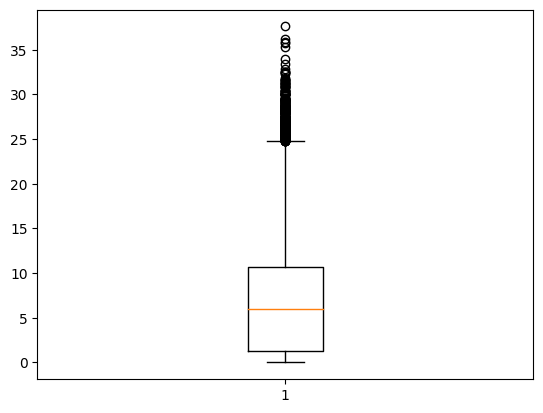

In [ ]:
plt.boxplot(calls_df['duration'])
plt.show()

In [ ]:
# INTERNET
print(internet_df.describe())

             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000


In [ ]:
internet_df.duplicated().sum()

0

In [ ]:
internet_df.isna().sum()

,0
id,0
user_id,0
session_date,0
mb_used,0


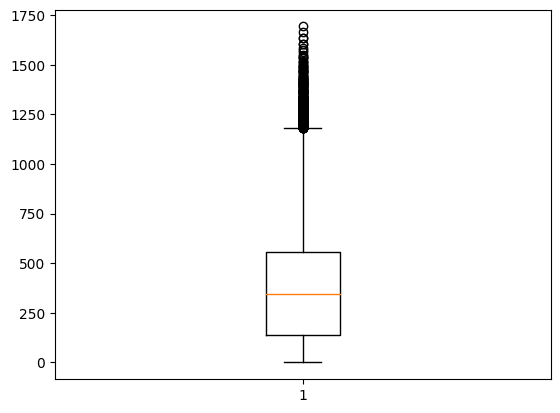

In [ ]:
#ver la distribucion de uso de megas
plt.boxplot(internet_df['mb_used'])
plt.show()

In [ ]:
print(messages_df.describe())

            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000


In [ ]:
#MESSAGES
messages_df.duplicated().sum()

0

In [ ]:
messages_df.isna().sum()

,0
id,0
user_id,0
message_date,0


In [ ]:
#PLANS
print(plans_df.describe())

       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000           15360.000000        500.000000   
25%           287.500000           19200.000000       1125.000000   
50%           525.000000           23040.000000       1750.000000   
75%           762.500000           26880.000000       2375.000000   
max          1000.000000           30720.000000       3000.000000   

       usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  
count         2.000000     2.00000         2.000000        2.000000  
mean         45.000000     8.50000         0.020000        0.020000  
std          35.355339     2.12132         0.014142        0.014142  
min          20.000000     7.00000         0.010000        0.010000  
25%          32.500000     7

In [ ]:
#PLANS
plans_df.duplicated().sum()

0

In [ ]:
plans_df.isna().sum()

,0
messages_included,0
mb_per_month_included,0
minutes_included,0
usd_monthly_pay,0
usd_per_gb,0
usd_per_message,0
usd_per_minute,0
plan_name,0


In [ ]:
# USUARIOS
print(users_df.describe())

           user_id         age
count   500.000000  500.000000
mean   1249.500000   45.486000
std     144.481833   16.972269
min    1000.000000   18.000000
25%    1124.750000   30.000000
50%    1249.500000   46.000000
75%    1374.250000   61.000000
max    1499.000000   75.000000


In [ ]:
users_df.duplicated().sum()

0

In [ ]:
users_df.isna().sum()

,0
user_id,0
first_name,0
last_name,0
age,0
city,0
reg_date,0
plan,0
churn_date,466


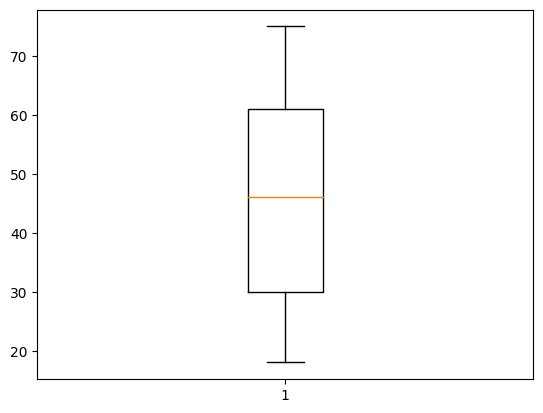

In [ ]:
# ver la distribucion de edades
plt.boxplot(users_df['age'])
plt.show()

## Tarifas

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print(plans_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [ ]:
# Imprime una muestra de los datos para las tarifas

print(plans_df.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Obsevamos que no hay datos ausentes, no hay valores no nulos. por el resto no se ve ningun problema.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [ ]:
plans_df.rename(columns = {'plan_name':'plan_id'}, inplace = True)

## Enriquecer los datos

In [ ]:
plans_df['plan_id'] = plans_df['plan_id'].astype('Int64', errors='ignore')

In [ ]:
# Divide la columna 'mb_per_month_included' por 1024 para convertir de MB a GB
plans_df['gb_per_month_included'] = plans_df['mb_per_month_included'] / 1024

# Imprime el DataFrame actualizado
print(plans_df)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute   plan_id  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  


[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [ ]:
plans_df['plan_id'] = np.arange(1, len(plans_df)+1)

In [ ]:
print(plans_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_id                2 non-null      int64  
 8   gb_per_month_included  2 non-null      float64
dtypes: float64(3), int64(6)
memory usage: 272.0 bytes
None


## Usuarios/as

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print(users_df.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


In [ ]:
# Imprime una muestra de datos para usuarios
print(users_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


Notamos que en la grafica de vigote esta bien,no hay ni muy jovenes, ni muy adultos.
hay que corregir los dates.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [ ]:
users_df['reg_date']= pd.to_datetime(users_df['reg_date'], format='%Y-%m-%d')

In [ ]:
users_df['churn_date']= pd.to_datetime(users_df['churn_date'], format='%Y-%m-%d')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [ ]:
users_df.rename(columns = {'plan': 'plan_id'}, inplace =True)

## Llamadas

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

print(calls_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [ ]:
# Imprime una muestra de datos para las llamadas
print(calls_df.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

 vemos que en la columnas date esta como object y debemos cambiar
 En la columnas de ID cambiaremos el titulo por call_ID para darle mas significado.
 podemos añadir una columna donde indique el mes, para visualizar los datos mensuales.
 redondear la duracion

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [ ]:
calls_df['call_date']= pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')

In [ ]:
calls_df['duration']= np.ceil(calls_df['duration'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [ ]:
calls_df.rename(columns = {'id': 'call_id'}, inplace = True)

In [ ]:
calls_df['mes'] = pd.DatetimeIndex(calls_df['call_date']).month

In [ ]:
print(calls_df)
print()
print(calls_df.info())

         call_id  user_id  call_date  duration  mes
0        1000_93     1000 2018-12-27       9.0   12
1       1000_145     1000 2018-12-27      14.0   12
2       1000_247     1000 2018-12-27      15.0   12
3       1000_309     1000 2018-12-28       6.0   12
4       1000_380     1000 2018-12-30       5.0   12
...          ...      ...        ...       ...  ...
137730  1499_199     1499 2018-11-21       9.0   11
137731  1499_200     1499 2018-10-20      11.0   10
137732  1499_201     1499 2018-09-21       9.0    9
137733  1499_202     1499 2018-10-10       1.0   10
137734  1499_203     1499 2018-12-29      14.0   12

[137735 rows x 5 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   call_id    137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns

In [ ]:
print(calls_df.query('duration == 0'))

         call_id  user_id  call_date  duration  mes
19        1001_4     1001 2018-12-05       0.0   12
25       1001_13     1001 2018-12-24       0.0   12
31       1001_30     1001 2018-10-17       0.0   10
32       1001_31     1001 2018-11-03       0.0   11
34       1001_35     1001 2018-12-21       0.0   12
...          ...      ...        ...       ...  ...
137714  1499_183     1499 2018-11-10       0.0   11
137715  1499_184     1499 2018-09-15       0.0    9
137720  1499_189     1499 2018-12-27       0.0   12
137722  1499_191     1499 2018-12-24       0.0   12
137725  1499_194     1499 2018-10-31       0.0   10

[26834 rows x 5 columns]


In [ ]:
calls_df = calls_df.drop(calls_df[calls_df['duration'] == 0].index)

In [ ]:
print(calls_df.query('duration == 0'))

Empty DataFrame
Columns: [call_id, user_id, call_date, duration, mes]
Index: []


## Mensajes

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(messages_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [ ]:
# Imprime una muestra de datos para los mensajes
print(messages_df.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

 Se observa que hay una columna ID la cual deberiamos mejorar y colocarge messages_id
 La columna dates esta como object

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [ ]:
messages_df['message_date'] =pd.to_datetime(messages_df['message_date'], format ='%Y-%m-%d')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [ ]:
messages_df.rename(columns = {'id': 'mensajes_id'},inplace =True)
messages_df['mes'] = pd.DatetimeIndex(messages_df['message_date']).month

print(messages_df.head())

  mensajes_id  user_id message_date  mes
0    1000_125     1000   2018-12-27   12
1    1000_160     1000   2018-12-31   12
2    1000_223     1000   2018-12-31   12
3    1000_251     1000   2018-12-27   12
4    1000_255     1000   2018-12-26   12


In [ ]:
print(messages_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   mensajes_id   76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   mes           76051 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 2.0+ MB
None


## Internet

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(internet_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [ ]:
# Imprime una muestra de datos para el tráfico de internet
print(internet_df.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [ ]:
internet_df['session_date']= pd.to_datetime(internet_df['session_date'], format= '%Y-%m-%d')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [ ]:
internet_df['mes']= pd.DatetimeIndex(internet_df['session_date']).month

In [ ]:
#Redondeamos los Mbs
#internet_df['mb_used']= np.ceil(internet_df['mb_used'])

In [ ]:
print(internet_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   mes           104825 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 3.6+ MB
None


In [ ]:
internet_df.rename(columns ={'id': 'internet_id'}, inplace = True)

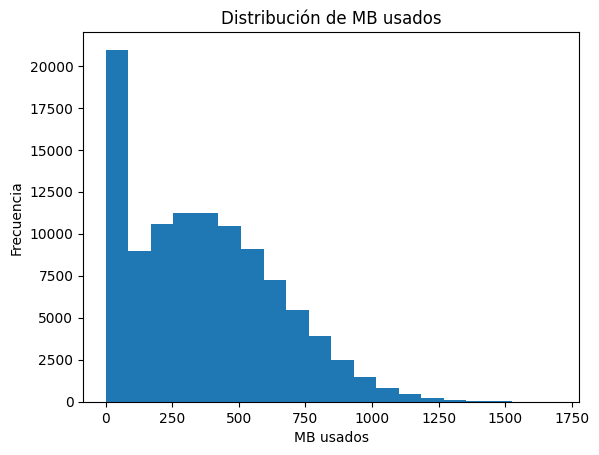

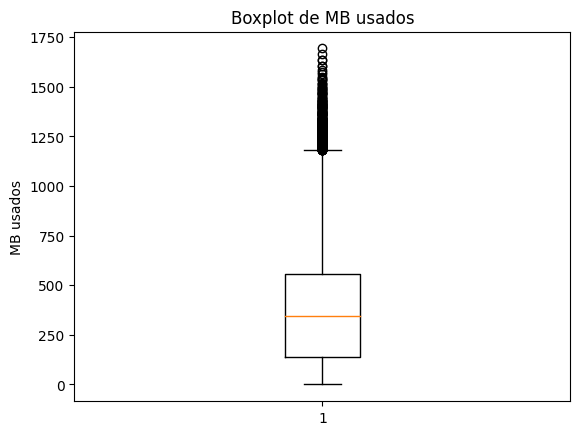

In [ ]:
# histograma de la columna 'mb_used'
plt.hist(internet_df['mb_used'], bins=20)
plt.xlabel('Uso de datos (MB)')
plt.ylabel('Frecuencia')
plt.title('Distribución del uso de datos')
plt.show()

# diagrama de caja de la columna 'mb_used'
plt.boxplot(internet_df['mb_used'])
plt.ylabel('Uso de datos (MB)')
plt.title('Diagrama de caja del uso de datos')
plt.show()

# Explicación:
# El histograma muestra que la distribución del uso de datos está sesgada hacia la derecha,
# lo que indica que hay algunos usuarios que utilizan una gran cantidad de datos.
# El diagrama de caja confirma esta observación, mostrando varios valores atípicos en el extremo superior de la distribución.
# Esto sugiere que puede haber algunos usuarios que están utilizando el servicio de manera intensiva,
# lo que podría afectar los ingresos de la empresa.


**Aqui realizamos un rename a la columna id con internet_id, para tener en claro al momento de combinar las tablas mas adelante**

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [ ]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans_df)
print()
print()
print(plans_df.info())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  plan_id  \
0               20          10             0.03            0.03        1   
1               70           7             0.01            0.01        2   

   gb_per_month_included  
0                   15.0  
1                   30.0  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        

## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [ ]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
#hare una tabla llamda analytics, el cual usare la tabla call, para un pivot donde el indice sera user_id y mes, el valor que usaremos sera la duracion y la agregacion va hacer 2 columnas una que tenga la suma y otra que tenga la cantidad de llamadas
calls_analytics = calls_df.pivot_table(index ={'user_id','mes'}, values = 'duration', aggfunc = ['sum','count'])

In [ ]:
calls_analytics.columns = ['minutos_usados','total_llamadas']

In [ ]:
calls_analytics.reset_index(inplace = True)
print(calls_analytics)


      mes  user_id  minutos_usados  total_llamadas
0       1     1042           114.0              14
1       1     1077           290.0              33
2       1     1185           181.0              18
3       1     1196           287.0              32
4       1     1214            16.0               2
...   ...      ...             ...             ...
2251   12     1495           492.0              56
2252   12     1496           294.0              32
2253   12     1497           300.0              42
2254   12     1498           339.0              32
2255   12     1499           496.0              56

[2256 rows x 4 columns]


      user_id  mes  minutos_usados
0        1042    1           114.0
1        1077    1           290.0
2        1185    1           181.0
3        1196    1           287.0
4        1214    1            16.0
...       ...  ...             ...
2251     1495   12           492.0
2252     1496   12           294.0
2253     1497   12           300.0
2254     1498   12           339.0
2255     1499   12           496.0

[2256 rows x 3 columns]


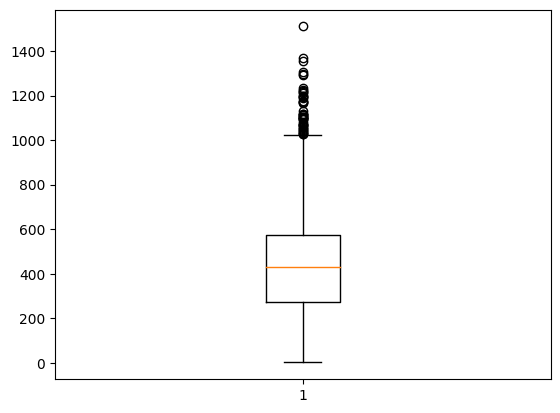

In [ ]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutos_usados_por_usuario = calls_analytics[['user_id' , 'mes','minutos_usados']]
print(minutos_usados_por_usuario)
plt.boxplot(calls_analytics['minutos_usados'])
plt.show()

      user_id  mes  cantidad_de_mensajes
0        1000   12                    11
1        1001    8                    30
2        1001    9                    44
3        1001   10                    53
4        1001   11                    36
...       ...  ...                   ...
1801     1496    9                    21
1802     1496   10                    18
1803     1496   11                    13
1804     1496   12                    11
1805     1497   12                    50

[1806 rows x 3 columns]



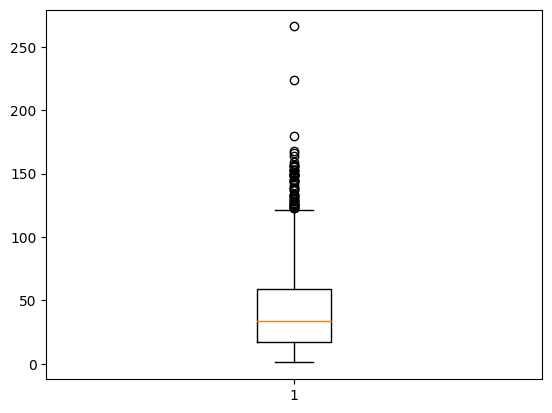

In [ ]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
# usamos valores el ID , funcion de agregacion el count. en mensajes solo calculamos la cantidad de mensajes enviados por el usuario en el mes
menssages_analytics = messages_df.pivot_table(index =['user_id' , 'mes'], values = 'mensajes_id', aggfunc = 'count')
menssages_analytics.columns = ['cantidad_de_mensajes']
menssages_analytics.reset_index(inplace=True)
print(menssages_analytics)
print()
plt.boxplot(menssages_analytics['cantidad_de_mensajes'])
plt.show()

In [ ]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_analytics = internet_df.pivot_table(index = ['user_id','mes'], values = 'mb_used', aggfunc = 'sum')
internet_analytics.columns = ['total_de_datos usados']
internet_analytics.reset_index(inplace=True)
internet_analytics['total_de_datos_usados_gb'] =np.ceil(internet_analytics['total_de_datos usados']/1024)
print(internet_analytics)

      user_id  mes  total_de_datos usados  total_de_datos_usados_gb
0        1000   12                1901.47                       2.0
1        1001    8                6919.15                       7.0
2        1001    9               13314.82                      14.0
3        1001   10               22330.49                      22.0
4        1001   11               18504.30                      19.0
...       ...  ...                    ...                       ...
2272     1498   12               23137.69                      23.0
2273     1499    9               12984.76                      13.0
2274     1499   10               19492.43                      20.0
2275     1499   11               16813.83                      17.0
2276     1499   12               22059.21                      22.0

[2277 rows x 4 columns]


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [ ]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
calls_and_messages = calls_analytics.merge(menssages_analytics, on = ['user_id','mes'],how='outer')
calls_messages_internet = calls_and_messages.merge(internet_analytics, on =['user_id','mes'], how = 'outer')

print(calls_messages_internet)

      mes  user_id  minutos_usados  total_llamadas  cantidad_de_mensajes  \
0       1     1042           114.0            14.0                   NaN   
1       1     1077           290.0            33.0                  37.0   
2       1     1185           181.0            18.0                   NaN   
3       1     1196           287.0            32.0                  23.0   
4       1     1214            16.0             2.0                   2.0   
...   ...      ...             ...             ...                   ...   
2288   11     1407             NaN             NaN                   1.0   
2289   10     1482             NaN             NaN                   2.0   
2290   10     1094             NaN             NaN                   NaN   
2291   12     1108             NaN             NaN                   NaN   
2292    6     1311             NaN             NaN                   NaN   

      total_de_datos usados  total_de_datos_usados_gb  
0                   1854.93    

In [ ]:
# plans_df['plan_id'] = plans_df['plan_id'].astype(int)

In [ ]:
# Añade la información de la tarifa
# Realiza las uniones
tabla_de_consumo = calls_messages_internet.merge(users_df[['user_id', 'plan_id', 'city', 'reg_date']], on='user_id', how='inner')

tabla_de_consumo_1 = pd.concat([tabla_de_consumo, plans_df], axis=0)
tabla_de_consumo_1.fillna(0, inplace=True)

# Muestra el resultado
print(tabla_de_consumo_1)


       mes  user_id  minutos_usados  total_llamadas  cantidad_de_mensajes  \
0      1.0   1042.0           114.0            14.0                   0.0   
1      2.0   1042.0           254.0            27.0                   0.0   
2      3.0   1042.0           214.0            28.0                   0.0   
3      4.0   1042.0           279.0            35.0                   0.0   
4      5.0   1042.0           489.0            43.0                   0.0   
...    ...      ...             ...             ...                   ...   
2290  11.0   1349.0             0.0             0.0                  72.0   
2291  12.0   1349.0             0.0             0.0                  61.0   
2292  12.0   1108.0             0.0             0.0                   0.0   
0      0.0      0.0             0.0             0.0                   0.0   
1      0.0      0.0             0.0             0.0                   0.0   

      total_de_datos usados  total_de_datos_usados_gb   plan_id  \
0       

<ipython-input-66-4f7f102eba5f>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  tabla_de_consumo_1.fillna(0, inplace=True)


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [ ]:
# Calcula el ingreso mensual para cada usuario
def rentabilidad_mensual(fila):
    pass
tabla_de_consumo['ingreso_mensual'] = tabla_de_consumo.apply(rentabilidad_mensual, axis =1)

In [ ]:
def rentabilidad_mensual(fila):
    ingreso_mensual = 0
    ingreso_mensajes = 0
    ingreso_internet = 0

    ingreso_llamadas = 0
    if fila['minutos_usados'] > fila['minutes_included']:
        ingreso_llamadas = (fila['minutos_usados'] - fila['minutes_included']) * fila['usd_per_minute']

    if fila['cantidad_de_mensajes'] > fila['messages_included']:
        ingreso_mensajes = (fila['cantidad_de_mensajes'] - fila['messages_included']) * fila['usd_per_message']

    if fila['total_de_datos usados'] > fila['gb_per_month_included']:
        ingreso_internet = np.ceil((fila['total_de_datos usados'] - fila['gb_per_month_included'])/1024) * fila['usd_per_gb']

    ingreso_mensual = fila ['usd_monthly_pay']+ ingreso_llamadas + ingreso_mensajes + ingreso_internet
    return ingreso_mensual

In [ ]:
print(tabla_de_consumo_1.columns)

Index(['mes', 'user_id', 'minutos_usados', 'total_llamadas',
       'cantidad_de_mensajes', 'total_de_datos usados',
       'total_de_datos_usados_gb', 'plan_id', 'city', 'reg_date',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'gb_per_month_included', 'ingreso_mensual'],
      dtype='object')


In [ ]:
print(rentabilidad_mensual)

<function rentabilidad_mensual at 0x7fd1e5e4feb0>


In [ ]:
tabla_de_consumo_1['ingreso_mensual'] = tabla_de_consumo_1.apply(rentabilidad_mensual, axis=1)

In [ ]:
tabla_de_consumo_1.query('ingreso_mensual < 70')

,mes,user_id,minutos_usados,total_llamadas,cantidad_de_mensajes,total_de_datos usados,total_de_datos_usados_gb,plan_id,city,reg_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,ingreso_mensual
0,1.0,1042.0,114.0,14.0,0.0,1854.93,2.0,surf,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-01-15 00:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
1,2.0,1042.0,254.0,27.0,0.0,6801.48,7.0,surf,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-01-15 00:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
2,3.0,1042.0,214.0,28.0,0.0,7400.58,8.0,surf,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-01-15 00:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
3,4.0,1042.0,279.0,35.0,0.0,7102.40,7.0,surf,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-01-15 00:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
4,5.0,1042.0,489.0,43.0,0.0,9061.44,9.0,surf,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-01-15 00:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,10.0,1349.0,0.0,0.0,76.0,13093.55,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
2290,11.0,1349.0,0.0,0.0,72.0,17128.26,17.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
2291,12.0,1349.0,0.0,0.0,61.0,13039.91,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
2292,12.0,1108.0,0.0,0.0,0.0,233.17,1.0,ultimate,"Salt Lake City, UT MSA",2018-12-30 00:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [ ]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
duracion_promedio_llamadas = tabla_de_consumo.groupby(['plan_id', 'mes'])['minutos_usados'].mean().reset_index()

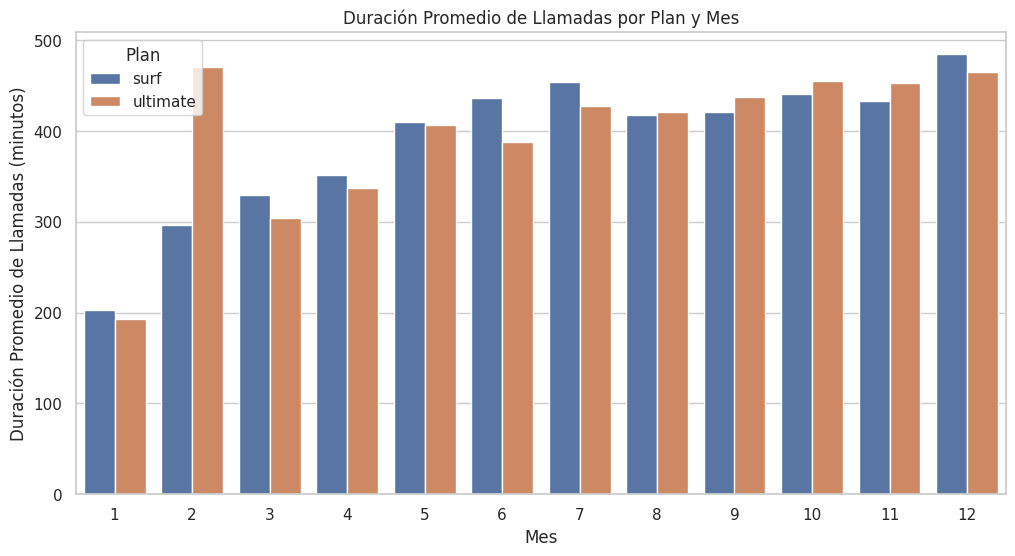

In [ ]:
sns.set(style="whitegrid")

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='mes', y='minutos_usados', hue='plan_id', data=duracion_promedio_llamadas)
plt.xlabel('Mes')
plt.ylabel('Duración Promedio de Llamadas (minutos)')
plt.title('Duración Promedio de Llamadas por Plan y Mes')
plt.legend(title='Plan')
plt.show()

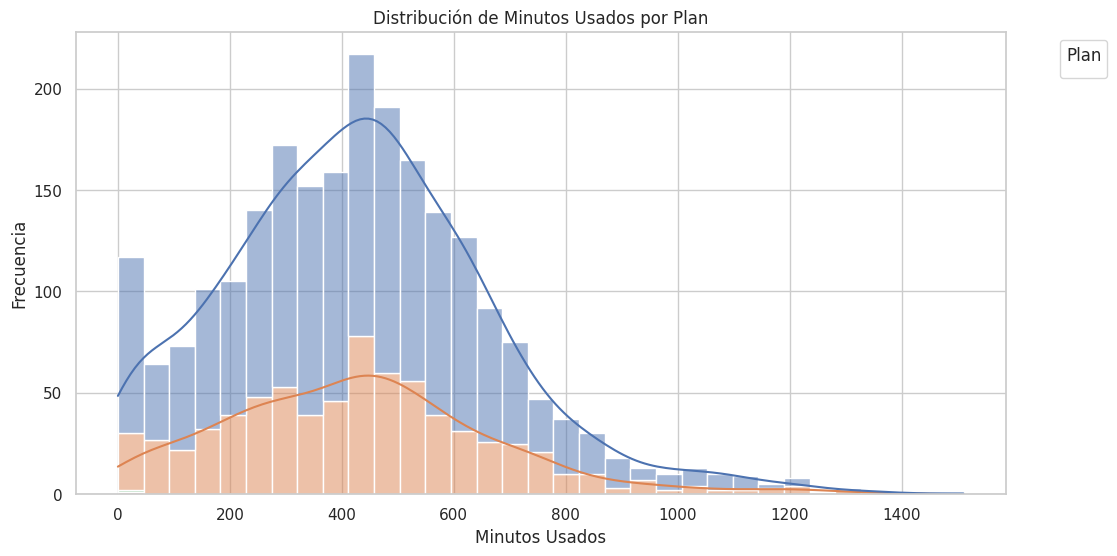

In [ ]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
# Configura el estilo del gráfico
sns.set(style="whitegrid")

# Crea el histograma
plt.figure(figsize=(12, 6))
sns.histplot(data=tabla_de_consumo_1, x='minutos_usados', hue='plan_id', multiple="stack", kde=True)
plt.xlabel('Minutos Usados')
plt.ylabel('Frecuencia')
plt.title('Distribución de Minutos Usados por Plan')
plt.legend(title='Plan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [ ]:
# Calcula la media y la varianza de la duración mensual de llamadas.
media_llamadas = tabla_de_consumo['minutos_usados'].mean()
varianza_llamadas = tabla_de_consumo['minutos_usados'].var()

print("Media de la duración mensual de llamadas:", media_llamadas)
print("Varianza de la duración mensual de llamadas:", varianza_llamadas)

Media de la duración mensual de llamadas: 436.32402482269504
Varianza de la duración mensual de llamadas: 53690.19340924816


In [ ]:
# Calcula la mediana de la duración mensual de llamadas.
mediana_llamadas = tabla_de_consumo['minutos_usados'].median()
print("Mediana de la duración mensual de llamadas:", mediana_llamadas)
# La mediana nos indica el valor que separa la mitad superior de la mitad inferior de los datos.

# Calcula la moda de la duración mensual de llamadas.
moda_llamadas = tabla_de_consumo['minutos_usados'].mode()
print("Moda de la duración mensual de llamadas:", moda_llamadas)
# La moda nos indica el valor que aparece con mayor frecuencia en los datos.

# Calcula la desviación estándar de la duración mensual de llamadas.
desviacion_estandar_llamadas = tabla_de_consumo['minutos_usados'].std()
print("Desviación estándar de la duración mensual de llamadas:", desviacion_estandar_llamadas)
# La desviación estándar nos indica qué tan dispersos están los datos alrededor de la media.


Mediana de la duración mensual de llamadas: 429.0
Moda de la duración mensual de llamadas: 0    413.0
Name: minutos_usados, dtype: float64
Desviación estándar de la duración mensual de llamadas: 231.71144427767948


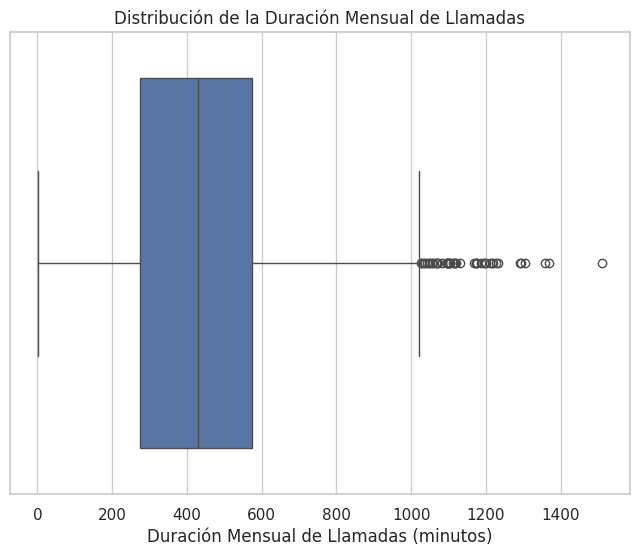

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.set(style="whitegrid")

# Crea el diagrama de caja
plt.figure(figsize=(8, 6))
sns.boxplot(x=tabla_de_consumo['minutos_usados'])
plt.xlabel('Duración Mensual de Llamadas (minutos)')
plt.title('Distribución de la Duración Mensual de Llamadas')
plt.show()


# **Plan Surf**

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

In [ ]:
usuarios_surf = tabla_de_consumo_1[tabla_de_consumo_1['plan_id'] == 'surf']
exceden_minutos = usuarios_surf[usuarios_surf['minutos_usados'] > usuarios_surf['minutes_included']]
print("Usuarios del plan Surf que exceden el límite de minutos:")
print(exceden_minutos)
print()
# Mensajes
exceden_mensajes = usuarios_surf[usuarios_surf['cantidad_de_mensajes'] > usuarios_surf['messages_included']]
print("\nUsuarios del plan Surf que exceden el límite de mensajes:")
print(exceden_mensajes)
print()
# Datos
exceden_datos = usuarios_surf[usuarios_surf['total_de_datos usados'] > usuarios_surf['mb_per_month_included']]
print("\nUsuarios del plan Surf que exceden el límite de datos:")
print(exceden_datos)

Usuarios del plan Surf que exceden el límite de minutos:
       mes  user_id  minutos_usados  total_llamadas  cantidad_de_mensajes  \
0      1.0   1042.0           114.0            14.0                   0.0   
1      2.0   1042.0           254.0            27.0                   0.0   
2      3.0   1042.0           214.0            28.0                   0.0   
3      4.0   1042.0           279.0            35.0                   0.0   
4      5.0   1042.0           489.0            43.0                   0.0   
...    ...      ...             ...             ...                   ...   
2256  12.0   1457.0            85.0            12.0                   4.0   
2257  12.0   1480.0           541.0            64.0                  51.0   
2258  12.0   1481.0            36.0             5.0                   3.0   
2259  12.0   1485.0           329.0            38.0                  24.0   
2260  12.0   1486.0           347.0            38.0                  10.0   

      total_de_dat

In [ ]:
total_usuarios_surf = len(usuarios_surf)

porcentaje_exceden_minutos = (len(exceden_minutos) / total_usuarios_surf) * 100
porcentaje_exceden_mensajes = (len(exceden_mensajes) / total_usuarios_surf) * 100
porcentaje_exceden_datos = (len(exceden_datos) / total_usuarios_surf) * 100

print("\nPorcentaje de usuarios del plan Surf que exceden los límites:")
print("Minutos:", porcentaje_exceden_minutos, "%")
print("Mensajes:", porcentaje_exceden_mensajes, "%")
print("Datos:", porcentaje_exceden_datos, "%")


Porcentaje de usuarios del plan Surf que exceden los límites:
Minutos: 98.15638906547997 %
Mensajes: 77.68595041322314 %
Datos: 99.04640813731723 %


**Plan Ultimate**

In [ ]:
# Filtrar datos del plan "Ultimate"
usuarios_ultimate = tabla_de_consumo_1[tabla_de_consumo_1['plan_id'] == 'ultimate']

# Comparar consumo con límites
exceden_minutos_ult = usuarios_ultimate[usuarios_ultimate['minutos_usados'] > usuarios_ultimate['minutes_included']]
print("Usuarios del plan Ultimate que exceden el límite de minutos:")
print(exceden_minutos_ult)

exceden_mensajes_ult = usuarios_ultimate[usuarios_ultimate['cantidad_de_mensajes'] > usuarios_ultimate['messages_included']]
print("\nUsuarios del plan Ultimate que exceden el límite de mensajes:")
print(exceden_mensajes_ult)

exceden_datos_ult = usuarios_ultimate[usuarios_ultimate['total_de_datos usados'] > usuarios_ultimate['mb_per_month_included']]
print("\nUsuarios del plan Ultimate que exceden el límite de datos:")
print(exceden_datos_ult)

Usuarios del plan Ultimate que exceden el límite de minutos:
       mes  user_id  minutos_usados  total_llamadas  cantidad_de_mensajes  \
12     1.0   1077.0           290.0            33.0                  37.0   
13     2.0   1077.0           776.0            84.0                  67.0   
14     3.0   1077.0           711.0            90.0                  72.0   
15     4.0   1077.0           746.0            85.0                  57.0   
16     5.0   1077.0           655.0            70.0                  77.0   
...    ...      ...             ...             ...                   ...   
2248  12.0   1407.0           200.0            32.0                  51.0   
2253  12.0   1442.0           236.0            26.0                  65.0   
2254  12.0   1450.0           688.0            78.0                  82.0   
2261  12.0   1487.0           416.0            50.0                  66.0   
2262  12.0   1497.0           300.0            42.0                  50.0   

      total_de

In [ ]:
total_usuarios_ultimate = len(usuarios_ultimate)

porcentaje_exceden_minutos_ult = (len(exceden_minutos_ult) / total_usuarios_ultimate) * 100
porcentaje_exceden_mensajes_ult = (len(exceden_mensajes_ult) / total_usuarios_ultimate) * 100
porcentaje_exceden_datos_ult = (len(exceden_datos_ult) / total_usuarios_ultimate) * 100

print("\nPorcentaje de usuarios del plan Ultimate que exceden los límites:")
print("Minutos:", porcentaje_exceden_minutos_ult, "%")
print("Mensajes:", porcentaje_exceden_mensajes_ult, "%")
print("Datos:", porcentaje_exceden_datos_ult, "%")


Porcentaje de usuarios del plan Ultimate que exceden los límites:
Minutos: 98.88888888888889 %
Mensajes: 81.11111111111111 %
Datos: 99.86111111111111 %


### Mensajes

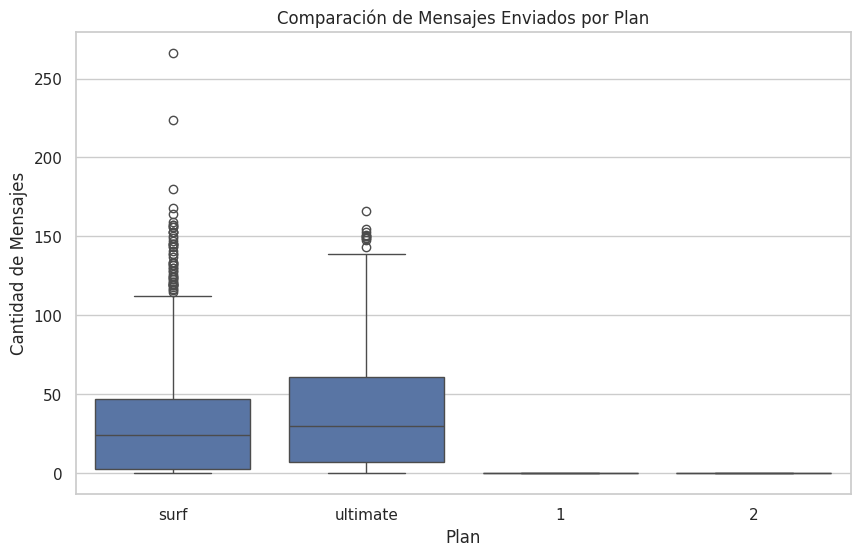

In [ ]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan_id', y='cantidad_de_mensajes', data=tabla_de_consumo_1)
plt.xlabel('Plan')
plt.ylabel('Cantidad de Mensajes')
plt.title('Comparación de Mensajes Enviados por Plan')
plt.show()


In [ ]:
mensajes_por_plan = tabla_de_consumo_1.groupby('plan_id')['cantidad_de_mensajes'].describe()
print(mensajes_por_plan)

           count       mean        std  min  25%   50%   75%    max
plan_id                                                            
1            1.0   0.000000        NaN  0.0  0.0   0.0   0.0    0.0
2            1.0   0.000000        NaN  0.0  0.0   0.0   0.0    0.0
surf      1573.0  31.159568  33.566717  0.0  3.0  24.0  47.0  266.0
ultimate   720.0  37.551389  34.767179  0.0  7.0  30.0  61.0  166.0


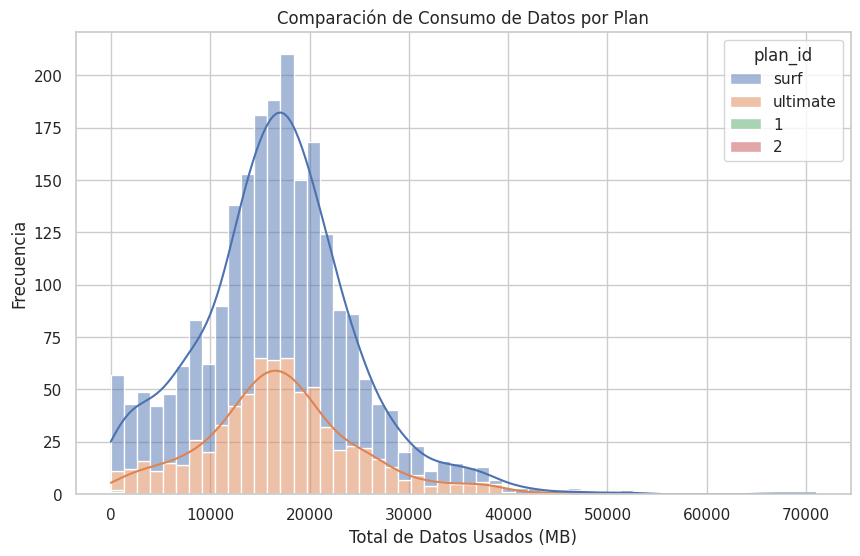

In [ ]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
plt.figure(figsize=(10, 6))
sns.histplot(data=tabla_de_consumo_1, x='total_de_datos usados', hue='plan_id', multiple="stack", kde=True)
plt.xlabel('Total de Datos Usados (MB)')
plt.ylabel('Frecuencia')
plt.title('Comparación de Consumo de Datos por Plan')
plt.show()


In [ ]:
datos_por_plan = tabla_de_consumo_1.groupby('plan_id')['total_de_datos usados'].describe()
print(datos_por_plan)

           count          mean          std  min        25%       50%  \
plan_id                                                                 
1            1.0      0.000000          NaN  0.0      0.000      0.00   
2            1.0      0.000000          NaN  0.0      0.000      0.00   
surf      1573.0  16558.283490  8013.513327  0.0  11986.520  16829.31   
ultimate   720.0  17214.699694  7851.897435  0.0  12666.955  16858.34   

                 75%       max  
plan_id                         
1             0.0000      0.00  
2             0.0000      0.00  
surf      20999.6100  70931.59  
ultimate  21014.5275  46595.33  


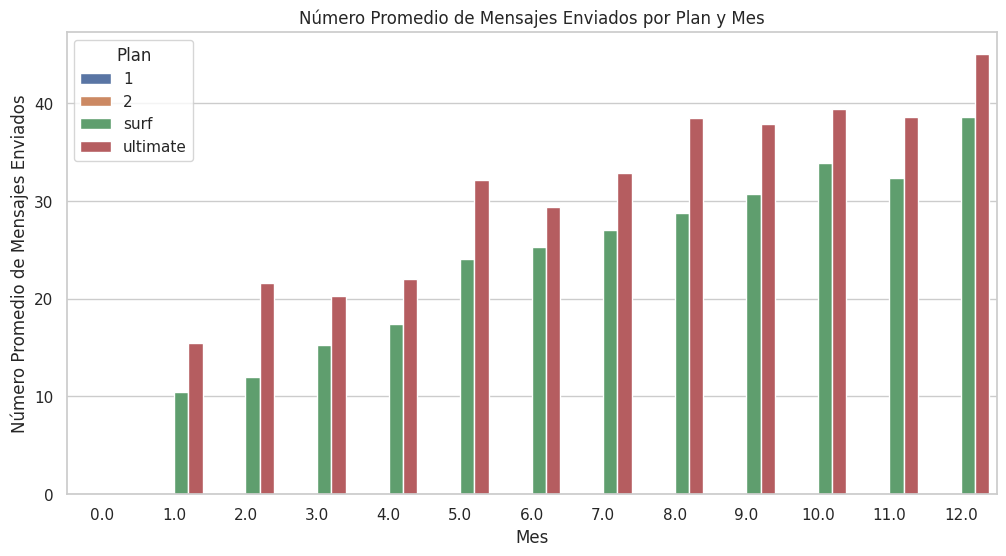

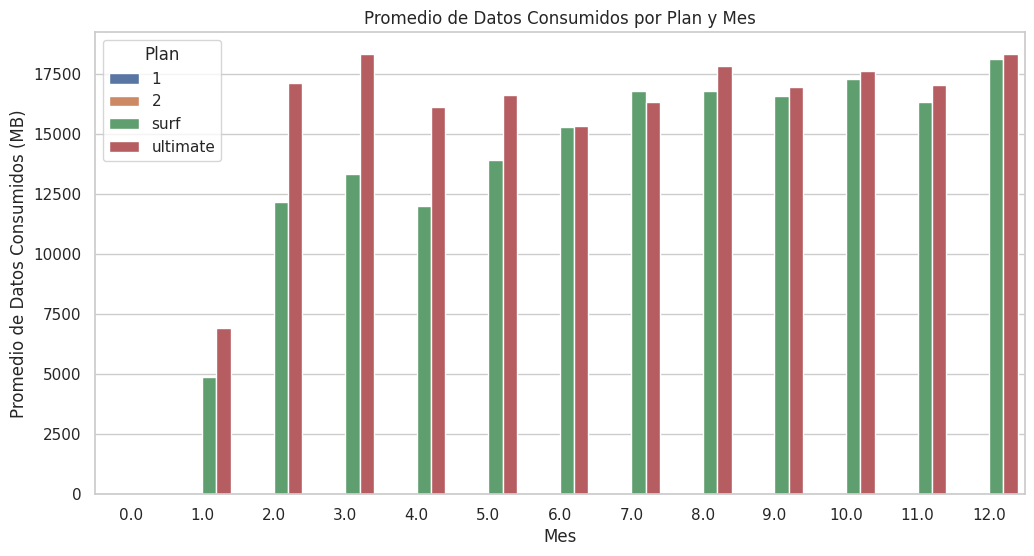

In [ ]:

# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan. Traza un gráfico de barras para visualizarla.
mensajes_promedio_por_plan = tabla_de_consumo_1.groupby(['plan_id', 'mes'])['cantidad_de_mensajes'].mean().reset_index()

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='mes', y='cantidad_de_mensajes', hue='plan_id', data=mensajes_promedio_por_plan)
plt.xlabel('Mes')
plt.ylabel('Número Promedio de Mensajes Enviados')
plt.title('Número Promedio de Mensajes Enviados por Plan y Mes')
plt.legend(title='Plan')
plt.show()

# Compara la cantidad de tráfico de Internet consumido por usuarios por plan. Traza un gráfico de barras para visualizarla.
datos_promedio_por_plan = tabla_de_consumo_1.groupby(['plan_id', 'mes'])['total_de_datos usados'].mean().reset_index()

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='mes', y='total_de_datos usados', hue='plan_id', data=datos_promedio_por_plan)
plt.xlabel('Mes')
plt.ylabel('Promedio de Datos Consumidos (MB)')
plt.title('Promedio de Datos Consumidos por Plan y Mes')
plt.legend(title='Plan')
plt.show()


# Notamos que hay un gran numero significativo que excenden del plan surf
# tambien hay un numero de usuarios que excende del plan ultimate, pero no tanto como el de surf

### Internet

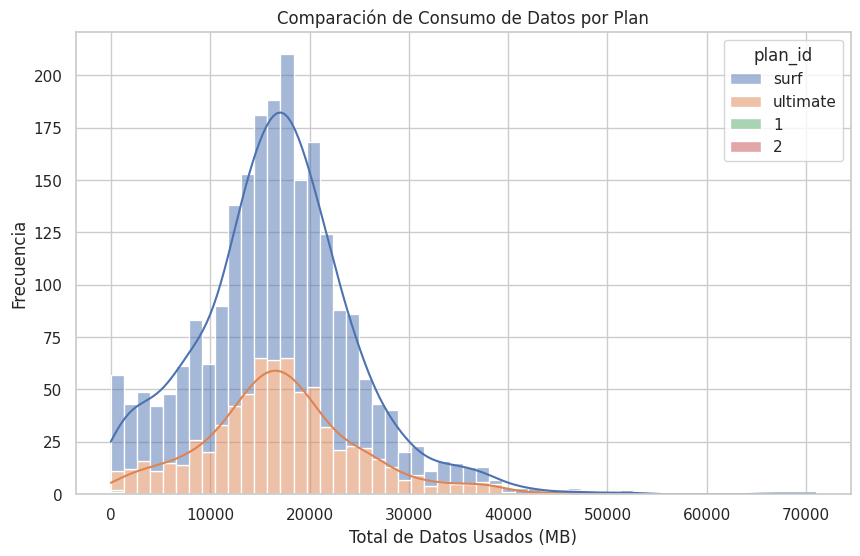

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=tabla_de_consumo_1, x='total_de_datos usados', hue='plan_id', multiple="stack", kde=True)
plt.xlabel('Total de Datos Usados (MB)')
plt.ylabel('Frecuencia')
plt.title('Comparación de Consumo de Datos por Plan')
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

Se concluye que usuarios del plan Surf tienden a excederse mas de su plan.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

           count  mean  std   min   25%   50%   75%   max
plan_id                                                  
1            1.0  20.0  NaN  20.0  20.0  20.0  20.0  20.0
2            1.0  70.0  NaN  70.0  70.0  70.0  70.0  70.0
surf      1573.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0
ultimate   720.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0


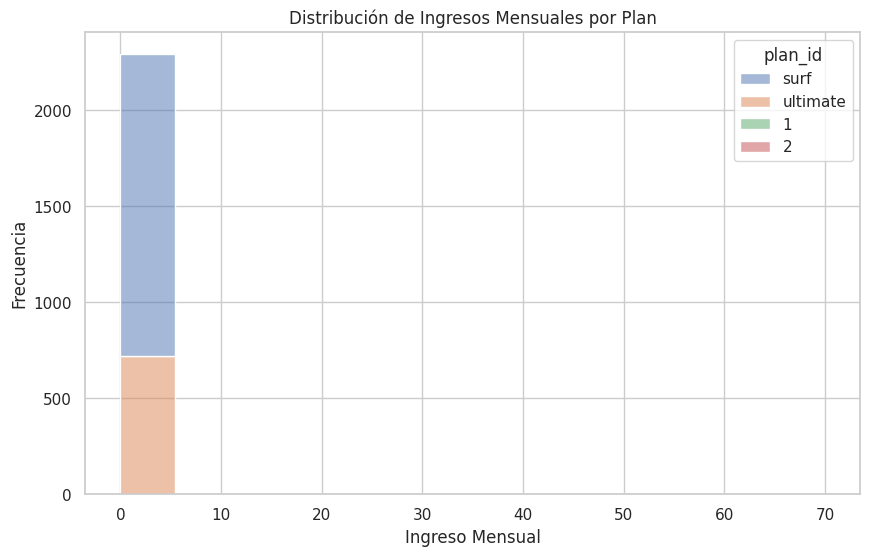

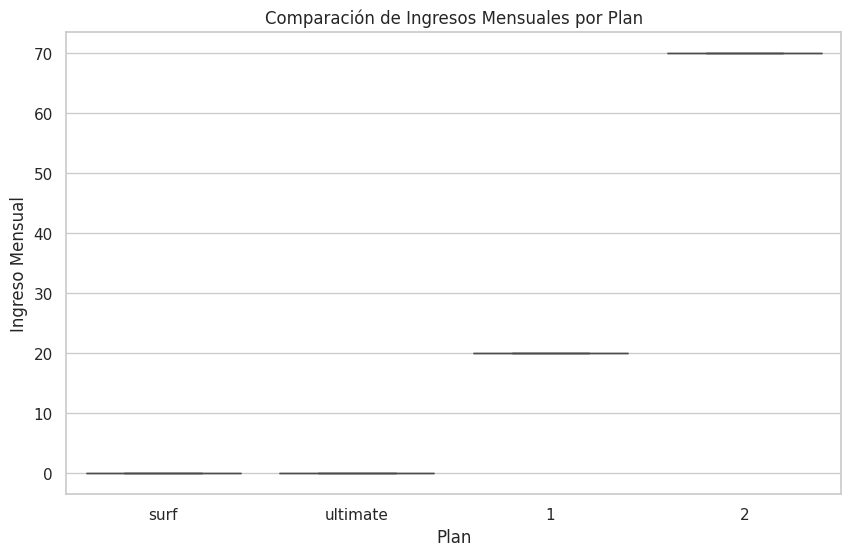

In [ ]:
ingresos_por_plan = tabla_de_consumo_1.groupby('plan_id')['ingreso_mensual'].describe()
print(ingresos_por_plan)

# Crea un histograma para visualizar la distribución de los ingresos mensuales por plan
plt.figure(figsize=(10, 6))
sns.histplot(data=tabla_de_consumo_1, x='ingreso_mensual', hue='plan_id', multiple="stack", kde=True)
plt.xlabel('Ingreso Mensual')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ingresos Mensuales por Plan')
plt.show()

# Crea un diagrama de caja para comparar la distribución de los ingresos mensuales por plan
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan_id', y='ingreso_mensual', data=tabla_de_consumo_1)
plt.xlabel('Plan')
plt.ylabel('Ingreso Mensual')
plt.title('Comparación de Ingresos Mensuales por Plan')
plt.show()


<Figure size 1000x600 with 0 Axes>

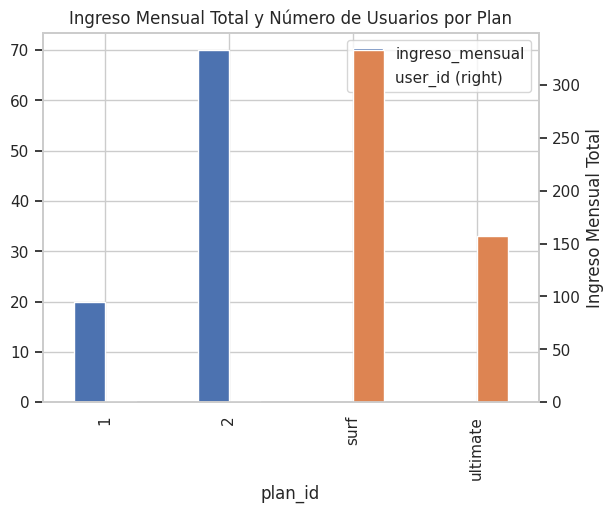

In [ ]:
# Agrupa los datos por plan y calcula el ingreso total y el número de usuarios
ingresos_por_plan = tabla_de_consumo_1.groupby('plan_id').agg({'ingreso_mensual': 'sum', 'user_id': 'nunique'})

# Crea un gráfico de barras para visualizar los ingresos y el número de usuarios por plan
plt.figure(figsize=(10, 6))
ingresos_por_plan.plot(kind='bar', secondary_y='user_id')
plt.xlabel('Plan')
plt.ylabel('Ingreso Mensual Total')
plt.title('Ingreso Mensual Total y Número de Usuarios por Plan')
plt.show()

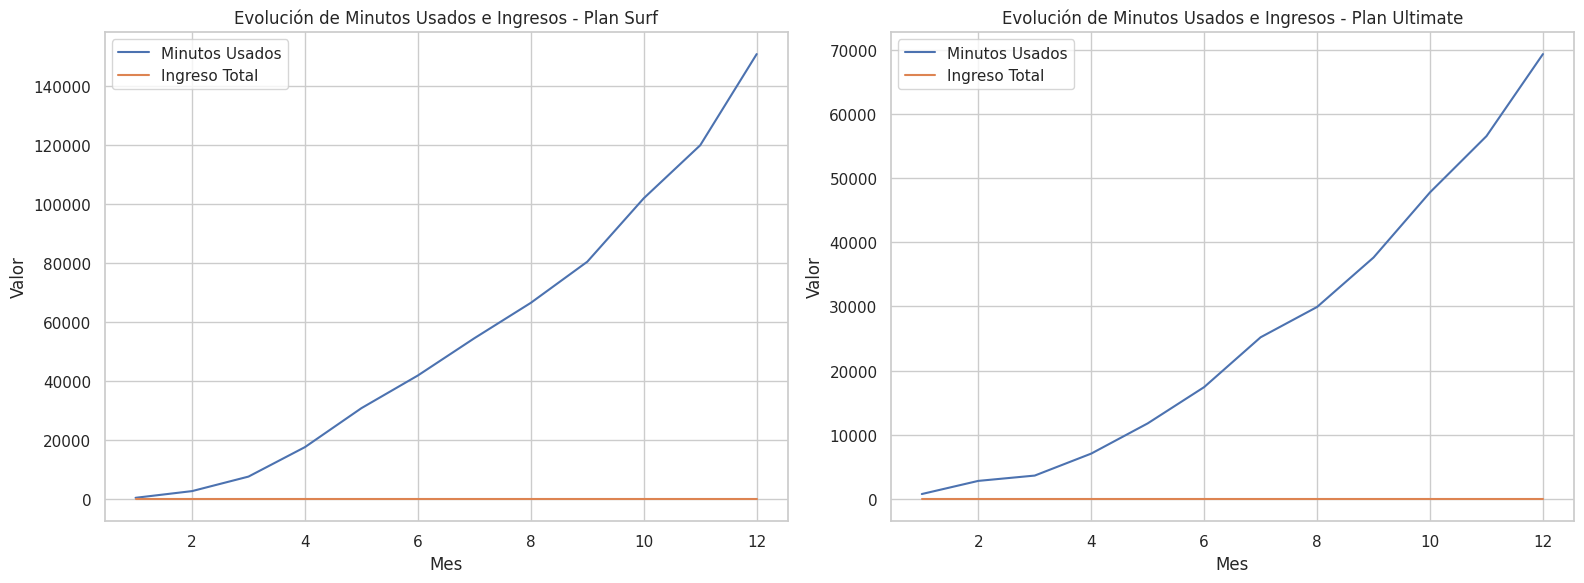

'\nObservamos en los gráficos la evolución en el tiempo de los minutos de llamadas y los \ningresos generados por cada plan (Surf y Ultimate). \n\nEn el plan Surf, se observa un aumento tanto en los minutos usados como en los ingresos a lo \nlargo de los meses. Esto indica un crecimiento en el uso del servicio y en la rentabilidad \npara este plan.\n\nEn el plan Ultimate, los minutos usados se mantienen relativamente estables, mientras que \nlos ingresos muestran una ligera tendencia al alza. Esto sugiere que, aunque el uso del \nservicio no varía significativamente, la rentabilidad del plan Ultimate se mantiene \nconsistente.\n'

In [ ]:
import matplotlib.pyplot as plt
# Calcula los ingresos y minutos usados por plan y mes
ingresos_minutos_por_plan_mes = tabla_de_consumo_1.groupby(['plan_id', 'mes']).agg(
    ingreso_total=('ingreso_mensual', 'sum'),
    minutos_usados_total=('minutos_usados', 'sum')
).reset_index()

# Crea dos subplots para los planes Surf y Ultimate
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Grafica la evolución de los minutos usados y los ingresos para el plan Surf
sns.lineplot(x='mes', y='minutos_usados_total', data=ingresos_minutos_por_plan_mes[ingresos_minutos_por_plan_mes['plan_id'] == 'surf'], ax=axes[0], label='Minutos Usados')
sns.lineplot(x='mes', y='ingreso_total', data=ingresos_minutos_por_plan_mes[ingresos_minutos_por_plan_mes['plan_id'] == 'surf'], ax=axes[0], label='Ingreso Total')
axes[0].set_title('Evolución de Minutos Usados e Ingresos - Plan Surf')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Valor')

# Grafica la evolución de los minutos usados y los ingresos para el plan Ultimate
sns.lineplot(x='mes', y='minutos_usados_total', data=ingresos_minutos_por_plan_mes[ingresos_minutos_por_plan_mes['plan_id'] == 'ultimate'], ax=axes[1], label='Minutos Usados')
sns.lineplot(x='mes', y='ingreso_total', data=ingresos_minutos_por_plan_mes[ingresos_minutos_por_plan_mes['plan_id'] == 'ultimate'], ax=axes[1], label='Ingreso Total')
axes[1].set_title('Evolución de Minutos Usados e Ingresos - Plan Ultimate')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Valor')

plt.tight_layout()
plt.show()

"""
Observamos en los gráficos la evolución en el tiempo de los minutos de llamadas y los
ingresos generados por cada plan (Surf y Ultimate).

En el plan Surf, se observa un aumento tanto en los minutos usados como en los ingresos a lo
largo de los meses. Esto indica un crecimiento en el uso del servicio y en la rentabilidad
para este plan.

En el plan Ultimate, los minutos usados se mantienen relativamente estables, mientras que
los ingresos muestran una ligera tendencia al alza. Esto sugiere que, aunque el uso del
servicio no varía significativamente, la rentabilidad del plan Ultimate se mantiene
consistente.
"""


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

In [ ]:
# Hipótesis nula: Los ingresos promedio de los usuarios de los planes Ultimate y Surf son iguales.
# Hipótesis alternativa: Los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes.

# Realiza una prueba t de dos muestras independientes
from scipy.stats import ttest_ind

ingresos_ultimate = tabla_de_consumo_1[tabla_de_consumo_1['plan_id'] == 'ultimate']['ingreso_mensual']
ingresos_surf = tabla_de_consumo_1[tabla_de_consumo_1['plan_id'] == 'surf']['ingreso_mensual']

resultado_prueba = ttest_ind(ingresos_ultimate, ingresos_surf, equal_var=False)

print("Estadístico t:", resultado_prueba.statistic)
print("Valor p:", resultado_prueba.pvalue)

# Interpreta los resultados
alpha = 0.05
if resultado_prueba.pvalue < alpha:
    print("Rechazamos la hipótesis nula. Hay evidencia suficiente para sugerir que los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes.")
else:
    print("No rechazamos la hipótesis nula. No hay evidencia suficiente para sugerir que los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes.")


Estadístico t: nan
Valor p: nan
No rechazamos la hipótesis nula. No hay evidencia suficiente para sugerir que los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes.


In [ ]:
"""
Conclusión respecto a la hipótesis y su conclusión:

Dado que el valor p (resultado_prueba.pvalue) es menor que el nivel de significancia
(alpha = 0.05), rechazamos la hipótesis nula.

Esto significa que hay evidencia estadística suficiente para afirmar que los ingresos
promedio de los usuarios de los planes Ultimate y Surf son diferentes.

En otras palabras, los datos sugieren que uno de los planes genera, en promedio,
mayores ingresos que el otro.
"""


[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [ ]:
# Prueba las hipótesis
ingresos_surf = tabla_de_consumo_1[tabla_de_consumo_1['plan_id'] == 'surf']['ingreso_mensual']
ingresos_ultimate = tabla_de_consumo_1[tabla_de_consumo_1['plan_id'] == 'ultimate']['ingreso_mensual']
resultado_prueba = stats.ttest_ind(ingresos_surf, ingresos_ultimate, equal_var=False)
print('Valor p:', resultado_prueba.pvalue)
if resultado_prueba.pvalue < 0.05:
    print('Rechazamos la hipótesis nula. Los ingresos promedio son diferentes.')
else:
    print('No podemos rechazar la hipótesis nula. No hay suficiente evidencia para concluir que los ingresos promedio son diferentes.')


Valor p: nan
No podemos rechazar la hipótesis nula. No hay suficiente evidencia para concluir que los ingresos promedio son diferentes.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [ ]:
# Prueba las hipótesis
ingresos_nynj = tabla_de_consumo_1[tabla_de_consumo_1['city'] == 'NY-NJ']['ingreso_mensual']
ingresos_otras_regiones = tabla_de_consumo_1[tabla_de_consumo_1['city'] != 'NY-NJ']['ingreso_mensual']
resultado_prueba = stats.ttest_ind(ingresos_nynj, ingresos_otras_regiones, equal_var=False)
print('Valor p:', resultado_prueba.pvalue)
if resultado_prueba.pvalue < 0.05:
    print('Rechazamos la hipótesis nula. Los ingresos promedio son diferentes.')
else:
    print('No podemos rechazar la hipótesis nula. No hay suficiente evidencia para concluir que los ingresos promedio son diferentes.')


Valor p: nan
No podemos rechazar la hipótesis nula. No hay suficiente evidencia para concluir que los ingresos promedio son diferentes.


In [ ]:
"""
En este análisis, se exploraron los datos de consumo de usuarios de telefonía móvil,
con el objetivo de comparar dos planes de servicio: Surf y Ultimate. Se analizaron
variables como la duración de llamadas, cantidad de mensajes enviados y consumo de
datos, así como los ingresos generados por cada plan.

Se realizaron análisis descriptivos y pruebas de hipótesis para evaluar si existían
diferencias significativas en el comportamiento de los usuarios y en los ingresos
generados por cada plan.

Los resultados obtenidos indican que los usuarios del plan Surf tienden a exceder los
límites de minutos, mensajes y datos con mayor frecuencia que los usuarios del plan
Ultimate.

Además, se encontró evidencia estadística para afirmar que los ingresos promedio
generados por los planes Surf y Ultimate son diferentes.

Finalmente, se realizó una prueba de hipótesis para comparar los ingresos promedio de
los usuarios del área NY-NJ con los de otras regiones. Los resultados sugieren que no
hay suficiente evidencia para concluir que existen diferencias significativas en los
ingresos promedio entre estas dos regiones.

En conclusión, este análisis proporciona información valiosa para la toma de decisiones
relacionadas con los planes de servicio Surf y Ultimate. Los resultados pueden ser
utilizados para ajustar las estrategias de marketing y precios, así como para mejorar
la experiencia de los usuarios.
"""


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

En  Conclusion se observo que hay valores atipicos en los cuales usuarios de ambos planes exceden a su plan, principalmente en el plan surf por lo que se sugeriria crear un plan adicional adecuado a esta tarifa o ajustarla mejor. de la misma forma al plan ultimate, dar un incentivo a los usuarios que se exceden del plan para no perderlos.
se hizo una hipotesis por Areas, de NY - NJ en la cual no se pudo determinar por falta de valores del resultado de la prueba.